# Netology: Feature Selection - лабораторная работа

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import scipy.stats as sts

Цель лабораторной работы получить практические знания по работе с признаками на известном датасете статистики самоубийств.

Вам необходимо будет подготовить данные для обучения линейной модели предсказания количества самоубийств (столбец - suicides/100k pop).

Чек-лист:
0. Изучите файл annotation.txt. Там содержится информация о датасете.
1. Загрузите датасет data.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите линейную модель. Напишите в markdown свои наблюдения по полученным результатам.

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!


In [2]:
def check_correlation(x, y):
    """
    ф-ция проверяет корреляцию между x и y
    
    """
    # проверка на нормальное распределение
    k2, p = sts.normaltest(x)
    alpha = 0.01
    print("p = {:g}".format(p))
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("X: Не нормальное распределение для alpha = ", alpha)
    else:
        print("X: Нормальное распределение для alpha = ", alpha)
    print("p = {:g}".format(p))
    
    k2, p = sts.normaltest(y)
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Y: Не нормальное распределение для alpha = ", alpha)
    else:
        print("Y: Нормальное распределение для alpha = ", alpha)    

    # построение графика    
    sns.regplot(x=x, y=y, fit_reg=True,marker=".")
    # расчет статистики
    corr, p_value = sts.pearsonr(x, y)
    print('Корреляция Пирсона: коэф-т', corr,', p-value', p_value)
    corr, p_value = sts.spearmanr(x, y)
    print('Корреляция Спирмена: коэф-т', corr,', p-value', p_value)
    corr, p_value = sts.kendalltau(x, y)
    print('Корреляция Кендалла: коэф-т', corr,', p-value', p_value)

## Данные

### Content
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### References
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

### Inspiration
Suicide Prevention.

In [3]:
# 1. Загрузите датасет data.csv.
data = pd.read_csv('data.csv')
data.head(5)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [5]:
data.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)

*Я так и не победил ошибку:*

In [7]:
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-6-4f326df48213> in <module>
#       1 import pandas_profiling
# ----> 2 pandas_profiling.ProfileReport(data)

# ~\anaconda3\lib\site-packages\pandas_profiling\__init__.py in __init__(self, df, **kwargs)
#      64         sample = kwargs.get('sample', df.head())
#      65 
# ---> 66         description_set = describe(df, **kwargs)
#      67 
#      68         self.html = to_html(sample,

# ~\anaconda3\lib\site-packages\pandas_profiling\describe.py in describe(df, bins, check_correlation, correlation_threshold, correlation_overrides, check_recoded, pool_size, **kwargs)
#     390             if name not in names:
#     391                 names.append(name)
# --> 392     variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
#     393     variable_stats.columns.names = df.columns.names
#     394 

# TypeError: concat() got an unexpected keyword argument 'join_axes'


### 3. Мнения по данным

In [8]:
data.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [9]:
# переименовать столбцы для удобства
data.rename(columns={'HDI for year':'hdi' },inplace=True)
# ,'gdp_for_year':'gdp', 'gdp_per_capita ($)':'gpd1'
data.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'hdi', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [10]:
data.describe(include=['object'])

,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820
unique,2,6,2321,2321,6
top,female,75+ years,Lithuania2001,"1,069,555,500,372",Generation X
freq,13910,4642,12,12,6408


*sex*
- пропусков нет, диапазон два значения - перекодировать (OneHotEncoding)

*age*

In [11]:
data.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

- пропусков нет - разложить в порядке возрастания(?), перекодировать

*country-year*

In [12]:
data['country-year'].unique()

array(['Albania1987', 'Albania1988', 'Albania1989', ..., 'Uzbekistan2012',
       'Uzbekistan2013', 'Uzbekistan2014'], dtype=object)

- из данных выделить страну и год ("новые признаки")
- стоблец data['country-year'] удалить
- усреднить по годам ?
- усреднить по странам?



In [13]:
import re

def country_year(x, pattern):
#     if re.search(pattern, x):
#         return re.search(pattern, x).group(1)
        return re.search(pattern, x).group(0)
    
# data['country'] =  data['country-year'].apply(lambda x: country_year(x, r'[a-zA-z]+'))
data['country'] =  data['country-year'].apply(lambda x: country_year(x, r'[a-zA-z ]+'))
data['year'] =  data['country-year'].apply(lambda x: country_year(x, r'\d+'))
print(data.country.isna().sum())
print(data.country.unique())
data.year.isna().sum()
data.year.value_counts()

0
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'Sout

2009    1068
2010    1056
2001    1056
2000    1032
2002    1032
2007    1032
2003    1032
2011    1032
2008    1020
2006    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [14]:
# data.drop(columns=['country-year'], inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   hdi                 8364 non-null   float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  country             27820 non-null  object 
 11  year                27820 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.5+ MB


*Human Development Index (HDI)* 

Human Development Index (HDI) (индек человеческого развития: продолжительность жизни, здоровье, знания, уровень жизни)

Definition: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living

In [16]:
data.hdi.unique()
data.hdi.isna().sum()

data.loc[data.hdi.isna()]['country'].unique()
# data.loc[data.hdi.isna()]['year'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala',
       'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Sain

- 19456 пропусков
- не во всех странах, годах есть оценка hdi?

In [17]:
data[data.country=='Albania'].hdi.isna().sum()

216

In [18]:
data[data.country=='Albania'].shape

(264, 12)

- на примере Албании из 264 записей у 216 нет данных по hdi

count    48.000000
mean      0.673000
std       0.039432
min       0.619000
25%       0.646750
50%       0.675500
75%       0.701750
max       0.722000
Name: hdi, dtype: float64

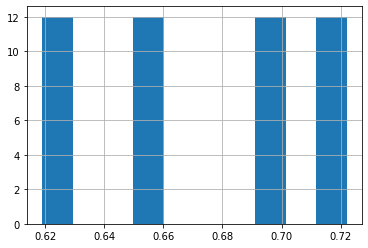

In [19]:
data[data.country=='Albania'].hdi.hist()
data[data.country=='Albania'].hdi.describe()

- среднее значение и 50%-квантиль практически равны - как вариант, все отсутствующие hdi сделать равным средним по конкретной стране (это, правда, исключает возможность учитывать изменение уровня жизни в стране со временем)

In [20]:
# data[data.hdi.isna()].data
hdi_mean = data.groupby(by='country').hdi.mean()
data.loc[data.hdi.isna(),'hdi'] = data.loc[data.hdi.isna(), 'country'].apply(lambda x: hdi_mean.loc[x])

In [21]:
print(data.loc[data.hdi.isna(),'country'].nunique())
print(data.loc[data.hdi.isna(),'country'].unique())
data.loc[data.hdi.isna()].describe()

11
['Aruba' 'Cabo Verde' 'Dominica' 'Kiribati' 'Macau' 'Mongolia'
 'Puerto Rico' 'Republic of Korea' 'Russian Federation'
 'Saint Kitts and Nevis' 'San Marino']


,suicides_no,population,suicides/100k pop,hdi,gdp_per_capita ($)
count,1486.000000,1.486000e+03,1486.000000,0.0,1486.000000
mean,996.746299,3.469963e+06,18.543392,NaN,14190.259758
std,2641.176683,5.209874e+06,27.949886,NaN,11300.115663
min,0.000000,2.780000e+02,0.000000,NaN,735.000000
25%,1.000000,1.556325e+04,0.420000,NaN,4129.250000
50%,33.500000,3.615220e+05,8.045000,NaN,12359.000000
75%,762.000000,4.483524e+06,23.737500,NaN,22342.000000
max,22338.000000,2.304663e+07,224.970000,NaN,69301.000000


- 11 стран не имеют оценок hdi вообще (ни в одном году)
- врятли, если провести оценку в этих странах, она будет выше среднего по миру
- можно подобрать страну, близку по ВВП, и взять ее hdi

count    26334.000000
mean         0.774271
std          0.087415
min          0.483000
25%          0.707900
50%          0.779600
75%          0.853000
max          0.944000
Name: hdi, dtype: float64

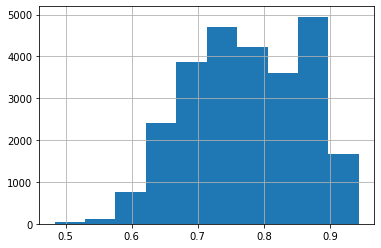

In [22]:
data.hdi.hist()
data.hdi.describe()

In [24]:
data.loc[data.hdi.isna(), 'hdi'] = data.hdi.mean()
data.hdi.isna().sum()

0

*gdp_for_year ($)*

Валово́й вну́тренний проду́кт (англ. Gross Domestic Product), общепринятое сокращение — ВВП (англ. GDP) 

- gdp_for_year ($) - перевести в числа

In [25]:
# заменить корявое название столбца
col= list(data.columns)
col[7] = 'gdp_y'
data.columns = col
# data.columns
# data.loc[:,'gdp_for_y']

count    2.782000e+04
mean     4.455810e+11
std      1.453610e+12
min      4.691962e+07
25%      8.985353e+09
50%      4.811469e+10
75%      2.602024e+11
max      1.812071e+13
Name: gdp_y, dtype: float64

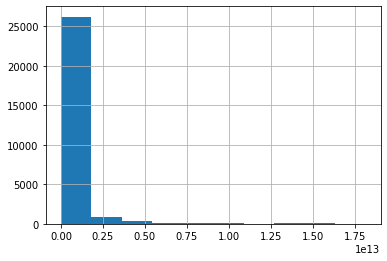

In [26]:
# убрать из данных все не цифры, перевести в float 
data.loc[:,'gdp_y'] = data.loc[:,'gdp_y'].replace(regex=True,  to_replace=r'[^\d]', value=r'').astype(float)
data.gdp_y.hist()
data.gdp_y.describe()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   hdi                 27820 non-null  float64
 7   gdp_y               27820 non-null  float64
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  country             27820 non-null  object 
 11  year                27820 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 2.5+ MB


*gdp_per_capita ($)*

- ВВП на душу населения?
- должна вычисляться делением ВВП_в_год на количество_насления
- тогда - лишний параметр => удалить

In [28]:
data.rename(columns={'gdp_per_capita ($)':'gdp_p' },inplace=True)
data.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'hdi', 'gdp_y', 'gdp_p', 'generation', 'country',
       'year'],
      dtype='object')

In [29]:
print(data[['gdp_p','gdp_y', 'population']].head(),'\n')
print(data.gdp_y / data.population - data.gdp_p)

   gdp_p         gdp_y  population
0    796  2.156625e+09      312900
1    796  2.156625e+09      308000
2    796  2.156625e+09      289700
3    796  2.156625e+09       21800
4    796  2.156625e+09      274300 

0          6096.377437
1          6206.028896
2          6648.338626
3         98131.747706
4          7066.285454
             ...      
27815     15108.836498
27816    178676.399334
27817     20523.537885
27818     21656.297606
27819     41519.996570
Length: 27820, dtype: float64


- последний стоблец, по идее, д. равняться нулу - раз нет, gdp_per_capita вычисляется как то иначе

p = 0
X: Не нормальное распределение для alpha =  0.01
p = 0
Y: Не нормальное распределение для alpha =  0.01
Корреляция Пирсона: коэф-т 0.247132891836501 , p-value 0.0
Корреляция Спирмена: коэф-т 0.8611040180245179 , p-value 0.0
Корреляция Кендалла: коэф-т 0.7051611011512506 , p-value 0.0


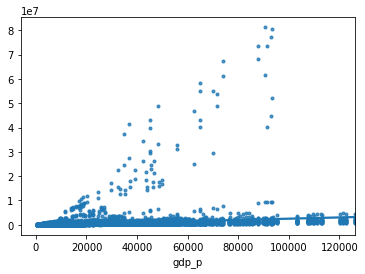

In [30]:
check_correlation(data.gdp_p, data.gdp_y / data.population)

*generation*

In [31]:
data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

- наименование поколения м.б. связано с возрастом на отчетный год

*suicides_no*

- количество случаев суицида
- целевая переменная:
"suicides/100k pop" = suicides_no / population / 100k
т.е. полная зависимость => столбец suicides_no удалить

In [32]:
data.drop(columns=['suicides_no'], inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                27820 non-null  object 
 1   age                27820 non-null  object 
 2   population         27820 non-null  int64  
 3   suicides/100k pop  27820 non-null  float64
 4   country-year       27820 non-null  object 
 5   hdi                27820 non-null  float64
 6   gdp_y              27820 non-null  float64
 7   gdp_p              27820 non-null  int64  
 8   generation         27820 non-null  object 
 9   country            27820 non-null  object 
 10  year               27820 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 2.3+ MB


### 4. Оценка зависимостей переменных между собой

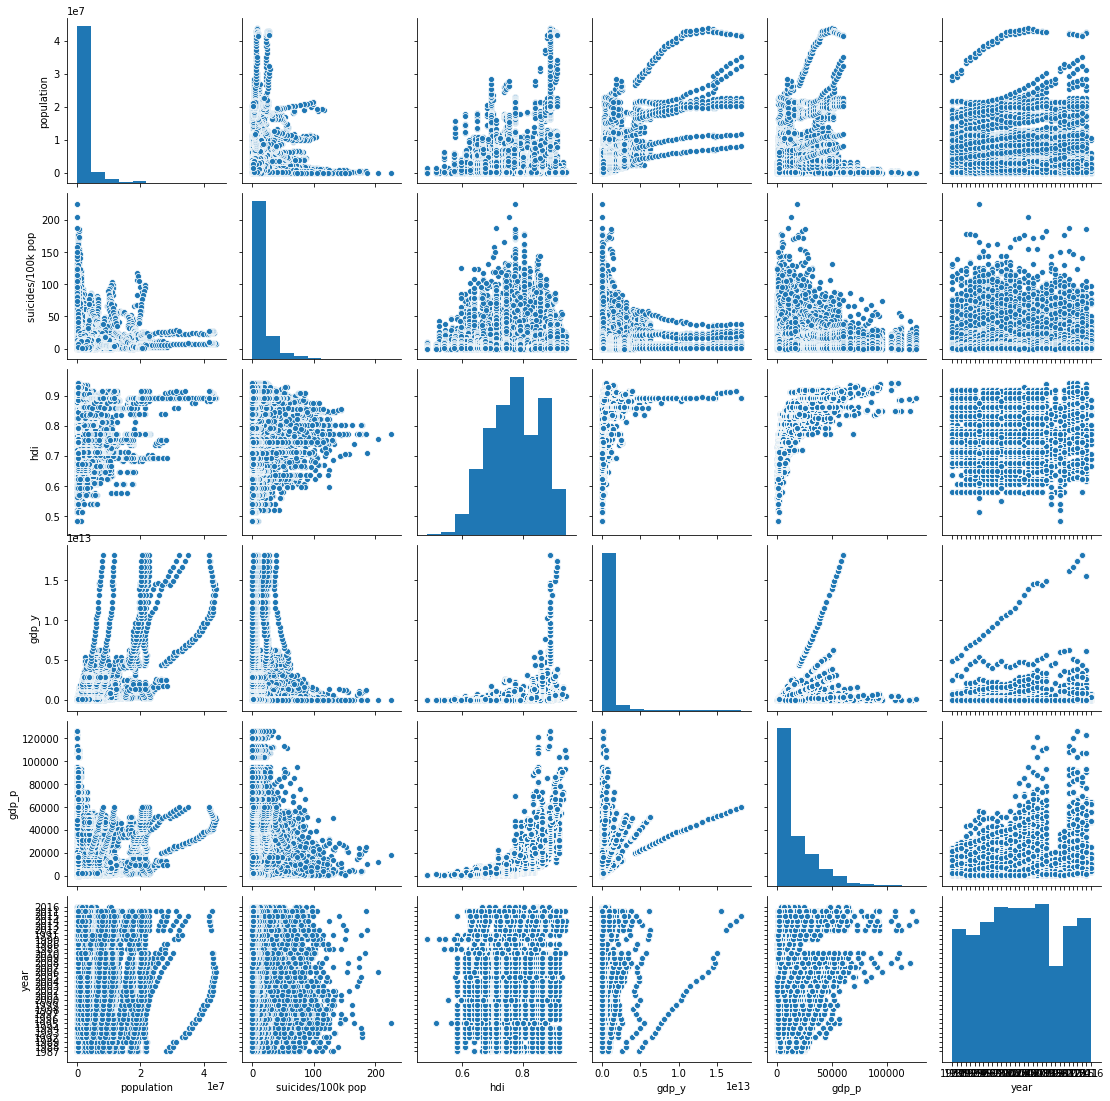

In [34]:
sns.pairplot(data)

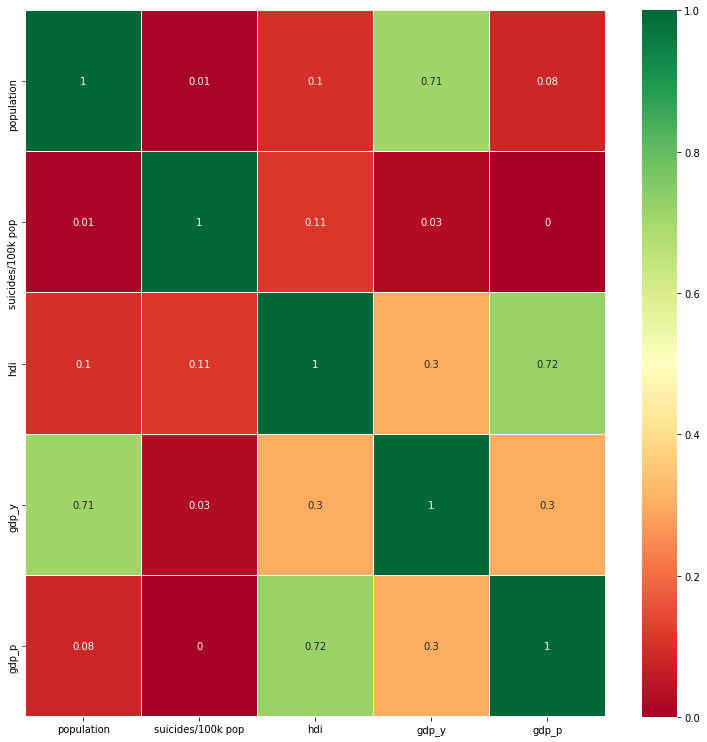

In [35]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

- gdp_p & hdi  - 0,72 - ВВП на душу и индекс жизни имет некую связь (на графике видно, что зависимость не линейная)
- gdp_y % population - 0.71 - очевидно: чем больше население, тем больше годовой доход, но не все так однозначно и линейно.

### 5. Преобразование категориальных признаков (т.е. как их сделать адекватными для моделей).

In [38]:
data.describe(include=['object'])

,sex,age,country-year,generation,country
count,27820,27820,27820,27820,27820
unique,2,6,2321,6,101
top,female,75+ years,Lithuania2001,Generation X,Mauritius
freq,13910,4642,12,6408,382


- sex, age, generation - преобразовать в столбцы  с помощью onehotencoding
- country-year - удалить
- year - в число

In [39]:
# год - в число
data.year = data.year.astype(int)
data.year.describe()

count    27820.000000
mean      2001.258375
std          8.469055
min       1985.000000
25%       1995.000000
50%       2002.000000
75%       2008.000000
max       2016.000000
Name: year, dtype: float64

In [41]:
# sex
data.sex.unique()

array(['male', 'female'], dtype=object)

In [48]:
cat_data = data[['sex', 'age']]

from sklearn.preprocessing import OneHotEncoder

ohe_enc = OneHotEncoder()
ohe_cats = ohe_enc.fit_transform(cat_data).toarray()
ohe_cats = pd.DataFrame(ohe_cats, columns=np.hstack(ohe_enc.categories_))
data = data.merge(ohe_cats, left_index=True, right_index=True)
data.head(5)

,sex,age,population,suicides/100k pop,country-year,hdi,gdp_y,gdp_p,generation,country,year,female,male,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,male,15-24 years,312900,6.71,Albania1987,0.673,2.156625e+09,796,Generation X,Albania,1987,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,male,35-54 years,308000,5.19,Albania1987,0.673,2.156625e+09,796,Silent,Albania,1987,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,female,15-24 years,289700,4.83,Albania1987,0.673,2.156625e+09,796,Generation X,Albania,1987,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,male,75+ years,21800,4.59,Albania1987,0.673,2.156625e+09,796,G.I. Generation,Albania,1987,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,male,25-34 years,274300,3.28,Albania1987,0.673,2.156625e+09,796,Boomers,Albania,1987,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

- название страны, год - удалить, если считать, что вся обстановка/история описывается остающимися параметрами.

In [43]:
data.head()

,sex,age,population,suicides/100k pop,country-year,hdi,gdp_y,gdp_p,generation,country,year
0,male,15-24 years,312900,6.71,Albania1987,0.673,2.156625e+09,796,Generation X,Albania,1987
1,male,35-54 years,308000,5.19,Albania1987,0.673,2.156625e+09,796,Silent,Albania,1987
2,female,15-24 years,289700,4.83,Albania1987,0.673,2.156625e+09,796,Generation X,Albania,1987
3,male,75+ years,21800,4.59,Albania1987,0.673,2.156625e+09,796,G.I. Generation,Albania,1987
4,male,25-34 years,274300,3.28,Albania1987,0.673,2.156625e+09,796,Boomers,Albania,1987


- возрастной период и поколение -  разновидности представления возраста на дату исследования
- поколение - указывает на "дату" рождения
- возраст - в каком возрасте произошло событие
- если бы целью исследования были поколения - параметр был бы важен; в данном случае - удалить

In [45]:
data.groupby(by=['age', 'generation']).mean()

population  suicides/100k pop       hdi  \
age         generation                                                   
15-24 years Generation X     1.949163e+06           9.567796  0.764197   
            Millenials       1.788931e+06           8.428153  0.782739   
25-34 years Boomers          1.943384e+06          12.032383  0.765258   
            Generation X     1.741458e+06          12.725272  0.770580   
            Millenials       1.891872e+06          10.616588  0.799597   
35-54 years Boomers          3.052611e+06          15.929086  0.769758   
            Generation X     3.450136e+06          13.215010  0.798411   
            Silent           2.759432e+06          12.926587  0.758528   
5-14 years  Generation X     2.052311e+06           0.501286  0.758528   
            Generation Z     1.703090e+06           0.642299  0.790132   
            Millenials       1.833544e+06           0.636813  0.768708   
55-74 years Boomers          2.305750e+06          14.159491  0.799597   
            G.I. Generation  1.712597e+06          15.277873  0.758528   
            Silent           1.829655e+06          16.829878  0.771032   
75+ years   G.I. Generation  4.953957e+05          26.529707  0.764197   
            Silent           6.392463e+05          21.802694  0.782739   

                                    gdp_y         gdp_p         year  
age         generation                                                
15-24 years Generation X     3.239948e+11  10910.432356  1993.355724  
            Millenials       5.467011e+11  21865.664557  2007.897943  
25-34 years Boomers          3.015543e+11   9586.512998  1989.856153  
            Generation X     4.341514e+11  17005.625652  2002.667412  
            Millenials       6.880864e+11  26884.776675  2012.992556  
35-54 years Boomers          4.095424e+11  15517.558416  2000.487129  
            Generation X     6.709858e+11  26342.154786  2012.456212  
            Silent           2.653398e+11   8658.501587  1987.638095  
5-14 years  Generation X     2.653398e+11   8658.501587  1987.638095  
            Generation Z     6.461464e+11  25631.672109  2010.806803  
            Millenials       3.761497e+11  13699.743426  1998.928287  
55-74 years Boomers          6.880864e+11  26884.776675  2012.992556  
            G.I. Generation  2.653398e+11   8658.501587  1987.638095  
            Silent           4.195957e+11  15975.379913  2001.009357  
75+ years   G.I. Generation  3.239948e+11  10910.432356  1993.355724  
            Silent           5.467011e+11  21865.664557  2007.897943

In [51]:
data.columns

Index(['sex', 'age', 'population', 'suicides/100k pop', 'country-year', 'hdi',
       'gdp_y', 'gdp_p', 'generation', 'country', 'year', 'female', 'male',
       '15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'],
      dtype='object')

In [55]:
X = data.drop(columns=['country-year', 'country','year', 'generation', 'sex','age','suicides/100k pop'])
y = data['suicides/100k pop']

In [59]:
X.head()

,population,hdi,gdp_y,gdp_p,female,male,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,312900,0.673,2.156625e+09,796,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,308000,0.673,2.156625e+09,796,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,289700,0.673,2.156625e+09,796,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,21800,0.673,2.156625e+09,796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,274300,0.673,2.156625e+09,796,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [62]:
# нормировать x
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
new_X = min_max.fit_transform(X)
X = pd.DataFrame(new_X, columns=X.columns)
X.head()

,population,hdi,gdp_y,gdp_p,female,male,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,0.007137,0.412148,0.000116,0.004322,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.007025,0.412148,0.000116,0.004322,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.006607,0.412148,0.000116,0.004322,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000491,0.412148,0.000116,0.004322,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.006256,0.412148,0.000116,0.004322,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
y.head()

0    6.71
1    5.19
2    4.83
3    4.59
4    3.28
Name: suicides/100k pop, dtype: float64

### 7. Разделите выборку на обучаемую и тестовую.

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### 8. Обучите линейную модель.

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

estimator = LinearRegression()
estimator.fit(X_train, y_train)

prediction = estimator.predict(X_test)

print('Train MAE: {}'.format(mean_absolute_error(y_train, estimator.predict(X_train))))
print('Test MAE: {}'.format(mean_absolute_error(y_test, prediction)))

Train MAE: 9.927331337616822
Test MAE: 10.175071890726098


In [66]:
y.describe()

count    27820.000000
mean        12.816097
std         18.961511
min          0.000000
25%          0.920000
50%          5.990000
75%         16.620000
max        224.970000
Name: suicides/100k pop, dtype: float64

**Модель не работает: при среднем значении 13 ошибка 10!**

Необходимо вернуться к этапу подготовки данных:
- разобраться с выбросами, в т.ч. в целевой переменной
- учесть различие стран
- усреднить данные по годам (год исследования, возраст, поколение)
- разобраться с переменными gdp_y, gdp_p
- ...